## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.555468  0.664724 -0.104889  1.442337  0.710428  0.953853
1  1.047670  0.025744 -0.556157  1.218354 -0.364253  1.206658
2  0.085758 -1.478679  0.439610 -1.281642 -0.567024 -1.927629
3  1.529637  1.149451 -1.653592 -1.436423 -1.418467 -0.589943
4  0.734764  1.373302 -0.342966 -1.243341 -1.357415 -0.736028


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9696199	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9589739	total: 58ms	remaining: 29s
2:	learn: 0.9489326	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9397849	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9309571	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9214881	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9105036	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9008652	total: 61.4ms	remaining: 7.62s
8:	learn: 0.8920339	total: 61.9ms	remaining: 6.81s
9:	learn: 0.8830861	total: 62.4ms	remaining: 6.17s
10:	learn: 0.8753605	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8656546	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8566628	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8491614	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8423088	total: 64.8ms	remaining: 4.26s
15:	learn: 0.8337754	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8261222	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8181349	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8108594	total: 66.7ms	remaining: 3.4

105:	learn: 0.4001346	total: 109ms	remaining: 915ms
106:	learn: 0.3967101	total: 109ms	remaining: 911ms
107:	learn: 0.3939253	total: 110ms	remaining: 905ms
108:	learn: 0.3915438	total: 110ms	remaining: 899ms
109:	learn: 0.3887659	total: 110ms	remaining: 893ms
110:	learn: 0.3859692	total: 111ms	remaining: 887ms
111:	learn: 0.3832151	total: 111ms	remaining: 881ms
112:	learn: 0.3809135	total: 112ms	remaining: 876ms
113:	learn: 0.3784796	total: 112ms	remaining: 871ms
114:	learn: 0.3757040	total: 113ms	remaining: 867ms
115:	learn: 0.3725780	total: 113ms	remaining: 862ms
116:	learn: 0.3695564	total: 113ms	remaining: 856ms
117:	learn: 0.3671008	total: 114ms	remaining: 851ms
118:	learn: 0.3655016	total: 114ms	remaining: 846ms
119:	learn: 0.3627517	total: 115ms	remaining: 841ms
120:	learn: 0.3602785	total: 115ms	remaining: 837ms
121:	learn: 0.3574606	total: 116ms	remaining: 833ms
122:	learn: 0.3549170	total: 116ms	remaining: 828ms
123:	learn: 0.3528679	total: 117ms	remaining: 824ms
124:	learn: 

264:	learn: 0.1465190	total: 187ms	remaining: 518ms
265:	learn: 0.1457036	total: 187ms	remaining: 517ms
266:	learn: 0.1450996	total: 188ms	remaining: 515ms
267:	learn: 0.1442504	total: 188ms	remaining: 513ms
268:	learn: 0.1433463	total: 189ms	remaining: 512ms
269:	learn: 0.1426318	total: 189ms	remaining: 511ms
270:	learn: 0.1417110	total: 189ms	remaining: 509ms
271:	learn: 0.1411105	total: 190ms	remaining: 508ms
272:	learn: 0.1403318	total: 190ms	remaining: 507ms
273:	learn: 0.1394619	total: 191ms	remaining: 505ms
274:	learn: 0.1385330	total: 191ms	remaining: 504ms
275:	learn: 0.1379522	total: 192ms	remaining: 503ms
276:	learn: 0.1371024	total: 192ms	remaining: 502ms
277:	learn: 0.1363399	total: 193ms	remaining: 500ms
278:	learn: 0.1356307	total: 193ms	remaining: 499ms
279:	learn: 0.1348703	total: 194ms	remaining: 498ms
280:	learn: 0.1340859	total: 194ms	remaining: 497ms
281:	learn: 0.1335185	total: 195ms	remaining: 496ms
282:	learn: 0.1328469	total: 195ms	remaining: 495ms
283:	learn: 

479:	learn: 0.0566634	total: 292ms	remaining: 316ms
480:	learn: 0.0564659	total: 293ms	remaining: 316ms
481:	learn: 0.0562484	total: 293ms	remaining: 315ms
482:	learn: 0.0560545	total: 294ms	remaining: 314ms
483:	learn: 0.0558493	total: 294ms	remaining: 313ms
484:	learn: 0.0556231	total: 294ms	remaining: 313ms
485:	learn: 0.0553737	total: 295ms	remaining: 312ms
486:	learn: 0.0551500	total: 295ms	remaining: 311ms
487:	learn: 0.0548582	total: 296ms	remaining: 310ms
488:	learn: 0.0545726	total: 296ms	remaining: 309ms
489:	learn: 0.0543814	total: 296ms	remaining: 309ms
490:	learn: 0.0542509	total: 297ms	remaining: 308ms
491:	learn: 0.0539811	total: 297ms	remaining: 307ms
492:	learn: 0.0537710	total: 298ms	remaining: 306ms
493:	learn: 0.0535346	total: 298ms	remaining: 305ms
494:	learn: 0.0533068	total: 298ms	remaining: 305ms
495:	learn: 0.0531193	total: 299ms	remaining: 304ms
496:	learn: 0.0530560	total: 299ms	remaining: 303ms
497:	learn: 0.0529315	total: 300ms	remaining: 302ms
498:	learn: 

644:	learn: 0.0291314	total: 370ms	remaining: 204ms
645:	learn: 0.0290193	total: 371ms	remaining: 203ms
646:	learn: 0.0288988	total: 371ms	remaining: 203ms
647:	learn: 0.0286733	total: 372ms	remaining: 202ms
648:	learn: 0.0285256	total: 372ms	remaining: 201ms
649:	learn: 0.0283053	total: 373ms	remaining: 201ms
650:	learn: 0.0281789	total: 373ms	remaining: 200ms
651:	learn: 0.0280368	total: 374ms	remaining: 200ms
652:	learn: 0.0278852	total: 374ms	remaining: 199ms
653:	learn: 0.0277332	total: 375ms	remaining: 198ms
654:	learn: 0.0276002	total: 375ms	remaining: 198ms
655:	learn: 0.0274543	total: 376ms	remaining: 197ms
656:	learn: 0.0273154	total: 376ms	remaining: 197ms
657:	learn: 0.0271864	total: 377ms	remaining: 196ms
658:	learn: 0.0270457	total: 378ms	remaining: 195ms
659:	learn: 0.0268994	total: 378ms	remaining: 195ms
660:	learn: 0.0267401	total: 379ms	remaining: 194ms
661:	learn: 0.0266198	total: 379ms	remaining: 194ms
662:	learn: 0.0264649	total: 380ms	remaining: 193ms
663:	learn: 

864:	learn: 0.0129468	total: 475ms	remaining: 74.1ms
865:	learn: 0.0128976	total: 476ms	remaining: 73.6ms
866:	learn: 0.0128716	total: 476ms	remaining: 73ms
867:	learn: 0.0128369	total: 477ms	remaining: 72.5ms
868:	learn: 0.0128019	total: 477ms	remaining: 71.9ms
869:	learn: 0.0127559	total: 478ms	remaining: 71.4ms
870:	learn: 0.0127120	total: 478ms	remaining: 70.8ms
871:	learn: 0.0126867	total: 478ms	remaining: 70.2ms
872:	learn: 0.0126438	total: 479ms	remaining: 69.7ms
873:	learn: 0.0125950	total: 479ms	remaining: 69.1ms
874:	learn: 0.0125552	total: 480ms	remaining: 68.5ms
875:	learn: 0.0125074	total: 480ms	remaining: 68ms
876:	learn: 0.0124683	total: 481ms	remaining: 67.4ms
877:	learn: 0.0124214	total: 481ms	remaining: 66.9ms
878:	learn: 0.0123798	total: 482ms	remaining: 66.3ms
879:	learn: 0.0123415	total: 482ms	remaining: 65.7ms
880:	learn: 0.0122956	total: 483ms	remaining: 65.2ms
881:	learn: 0.0122474	total: 483ms	remaining: 64.6ms
882:	learn: 0.0122024	total: 483ms	remaining: 64ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

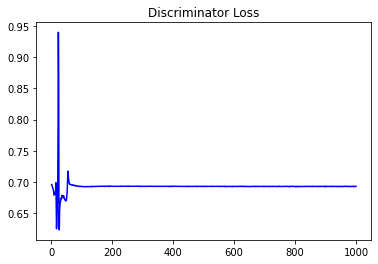

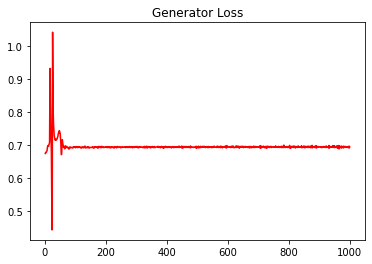

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09269367607650142


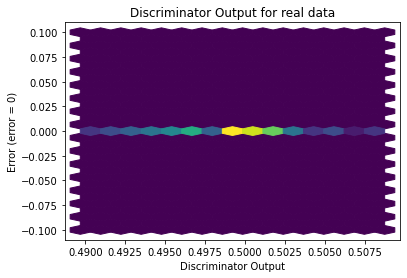

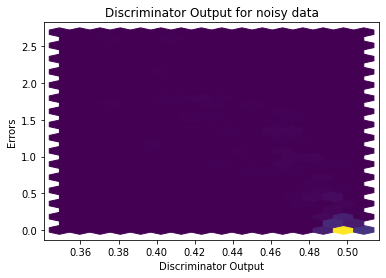

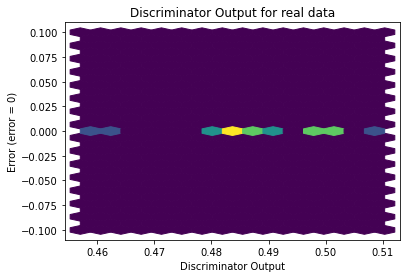

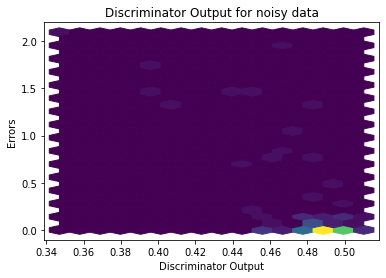

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


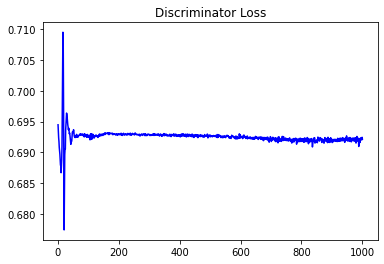

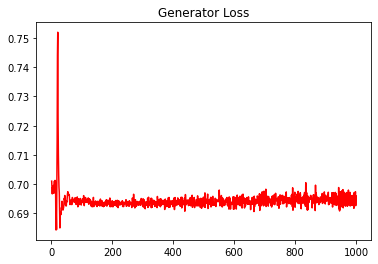

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10247083766054639


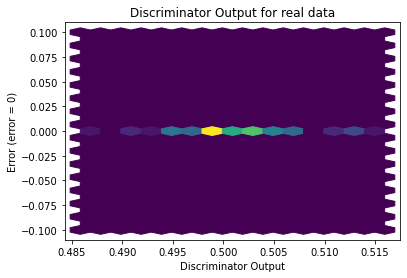

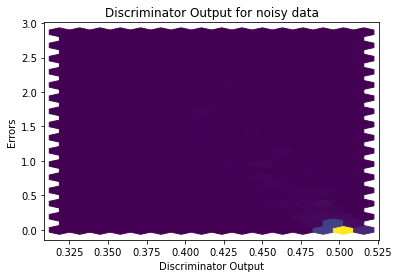

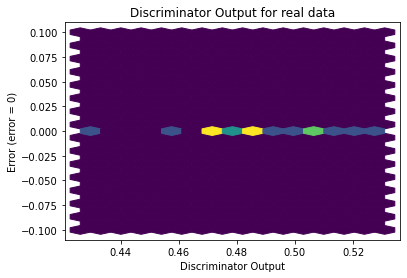

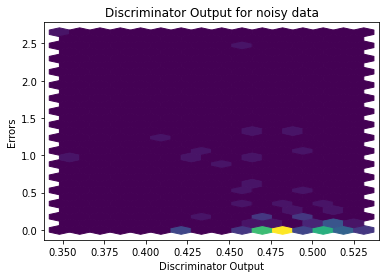

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4553]], requires_grad=True)
